# Imports

In [304]:
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from skimage.draw import polygon as skpolygon
from scipy.stats import linregress
import pandas as pd
from datetime import datetime, timedelta
from tqdm.notebook import tqdm
import mplcursors
from scipy.optimize import curve_fit
import cartopy.crs as ccrs
import cartopy
#%matplotlib widget


def Slope(ref_wl, start_wl, end_wl, cdom_data):
    def fit_func_exp(x, a, b):
        return a * np.exp(-b * (x-ref_wl))
    x = np.arange(start_wl, end_wl, 1)
    #print(x)
    y = cdom_data[(start_wl-200):(end_wl-200)]
    #print(y)
    params1_exp = curve_fit(fit_func_exp, x, y, method="lm", p0 = (cdom_data[ref_wl-200],0.017))
    return params1_exp[0][1]

# calculate CDOM slope 300-600
#S300600 = []
#for i, e in enumerate(CDOM_AWI_df["aCDOM(254)"][:-3]):
#    #print(i)
#    absorption = CDOM_AWI_df.iloc[i][15:].tolist()
#    try:
#        S300600.append(Slope(443, 300, 601, absorption))
#    except:
#        S300600.append(np.nan)
#df = pd.DataFrame(list(zip(S300600)),
#               columns =['S300600'])
#
#df.to_csv("/isipd/projects/p_PeCaBeau/01_data/Water_parameters/CDOM_300600.csv")

# Params

In [345]:
custom_date_parser = lambda x: datetime.strptime(x, "%d.%m.%Y")
CTD = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='Station_summary') #,date_parser=custom_date_parser

Isotopes = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='O-Isotopes (AWI)') #,date_parser=custom_date_parser

DOC = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='DOC (AWI)') #,date_parser=custom_date_parser

POC = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='POC (ETH)') #,date_parser=custom_date_parser

Alk = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='CT, AT') #,date_parser=custom_date_parser

cdom = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='Sub-4_CDOM (AWI)') #,date_parser=custom_date_parser

MUC = pd.read_excel(
    io="/isipd/projects/p_PeCaBeau/01_data/Masterfile_PeCaBeau.xlsx",
    sheet_name='MUC') #,date_parser=custom_date_parser


In [346]:
Salinity = CTD["salinity/CTD (PSU)"]
d18O = Isotopes["d18O (o/oo) vs. SMOW"]

POC_conc = POC["POC (mg/L)"]
POC_age = POC["14C age POC (yr)"]
DOC_conc = DOC["DOC/NPOC (mg/L)"]

DOC_conc = DOC["DOC/NPOC (mg/L)"]

TOC_conc = POC_conc + DOC_conc
Depth = CTD["corresponding depth/CTD"]

Lat = CTD["Latitude"]
Lon = CTD["Longitude"]

DIC = Alk["CT, final [μmol/kg]"]

CDOM254 = cdom["aCDOM(254)"]
CDOMS275295 = cdom["S275-295"]
CDOMS275295 = np.where(cdom["S275-295"]>0.015, cdom["S275-295"], np.nan)

SUVA254 = (np.array(CDOM254)/2.303) / np.array(DOC_conc)

OC_PERC = MUC["OC%"]

DepthName = POC["Depth_Name"]

POC_F14C = POC["F14C"]

f14C = MUC["F14C"]
MUC_d13C = MUC["d13C"]

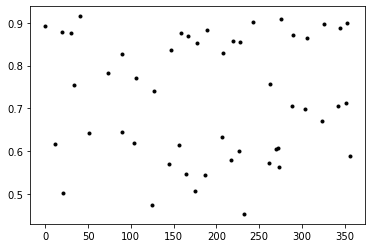

In [347]:
plt.plot(POC_F14C, 'k.')

# DOC vs SUVA

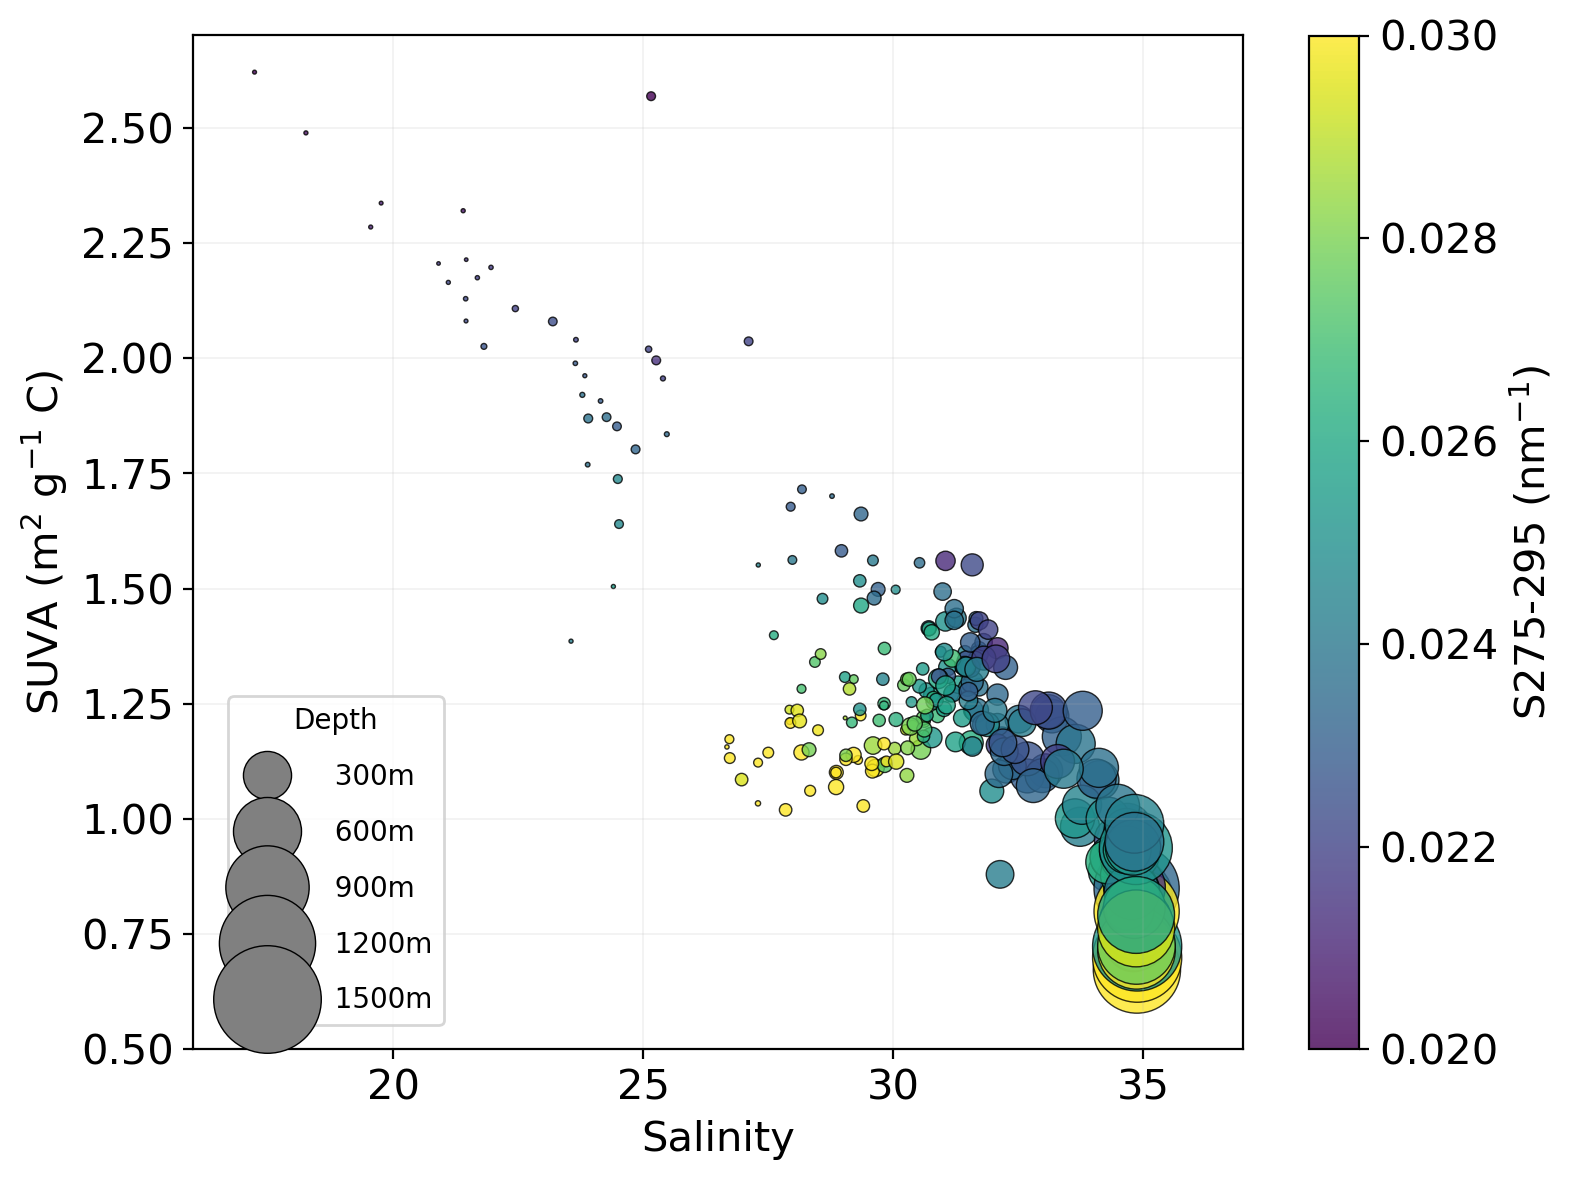

In [167]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(8,6), dpi=200,sharex =True)
f.patch.set_facecolor('w')
sizes=Depth


scatter=ax1.scatter(Salinity[:-3], SUVA254[:-3], c=CDOMS275295[:-3], s=Depth[:-3], marker='o', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=0.02, vmax=0.03, cmap=plt.cm.viridis)

#ax1.set_xlabel('DOC (mg L$^{-1}$)', fontsize=15)
ax1.set_xlabel('Salinity', fontsize=15)
ax1.set_ylabel('SUVA (m$^{2}$ g$^{-1}$ C)', fontsize=15)

cbar = plt.colorbar(scatter)
cbar.set_label('S275-295 (nm$^{-1}$)', fontsize=15)
cbar.ax.tick_params(labelsize=15)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlim(16,37)
ax1.set_ylim(0.5,2.7)
#aromaticity
#portion of humic matter
ax1.grid(lw=0.1)

scatterdepth = ([0,500,1000,1500])
scatter1 = ax1.scatter([1,2,3,4], [44,55,66,77], s=scatterdepth)
#legend1 = ax1.legend(*sc.legend_elements()[:],
#                    loc="lower left", title="Classes")
#ax1.add_artist(legend1)

kw = dict(prop="sizes", num=5, color='grey', fmt="  {x:.0f}m",markeredgewidth=0.5, markeredgecolor='k')
legend2 = ax1.legend(*scatter1.legend_elements(**kw),bbox_to_anchor=(0.02, 0.01),
                    loc="lower left", title="Depth",markerscale=1,labelspacing=1)

#kw = dict(prop="sizes", num=6, color="lightgrey", markeredgecolor='black',markeredgewidth=2)
#plt.legend(*ax.legend_elements(**kw),bbox_to_anchor=(1, 0),frameon=False,
#                    loc="lower left",markerscale=1,ncol=1,borderpad=2,labelspacing=4,handletextpad=2)


plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_SalinityvsSUVA_S275295_size.png", dpi=200)

# f14c

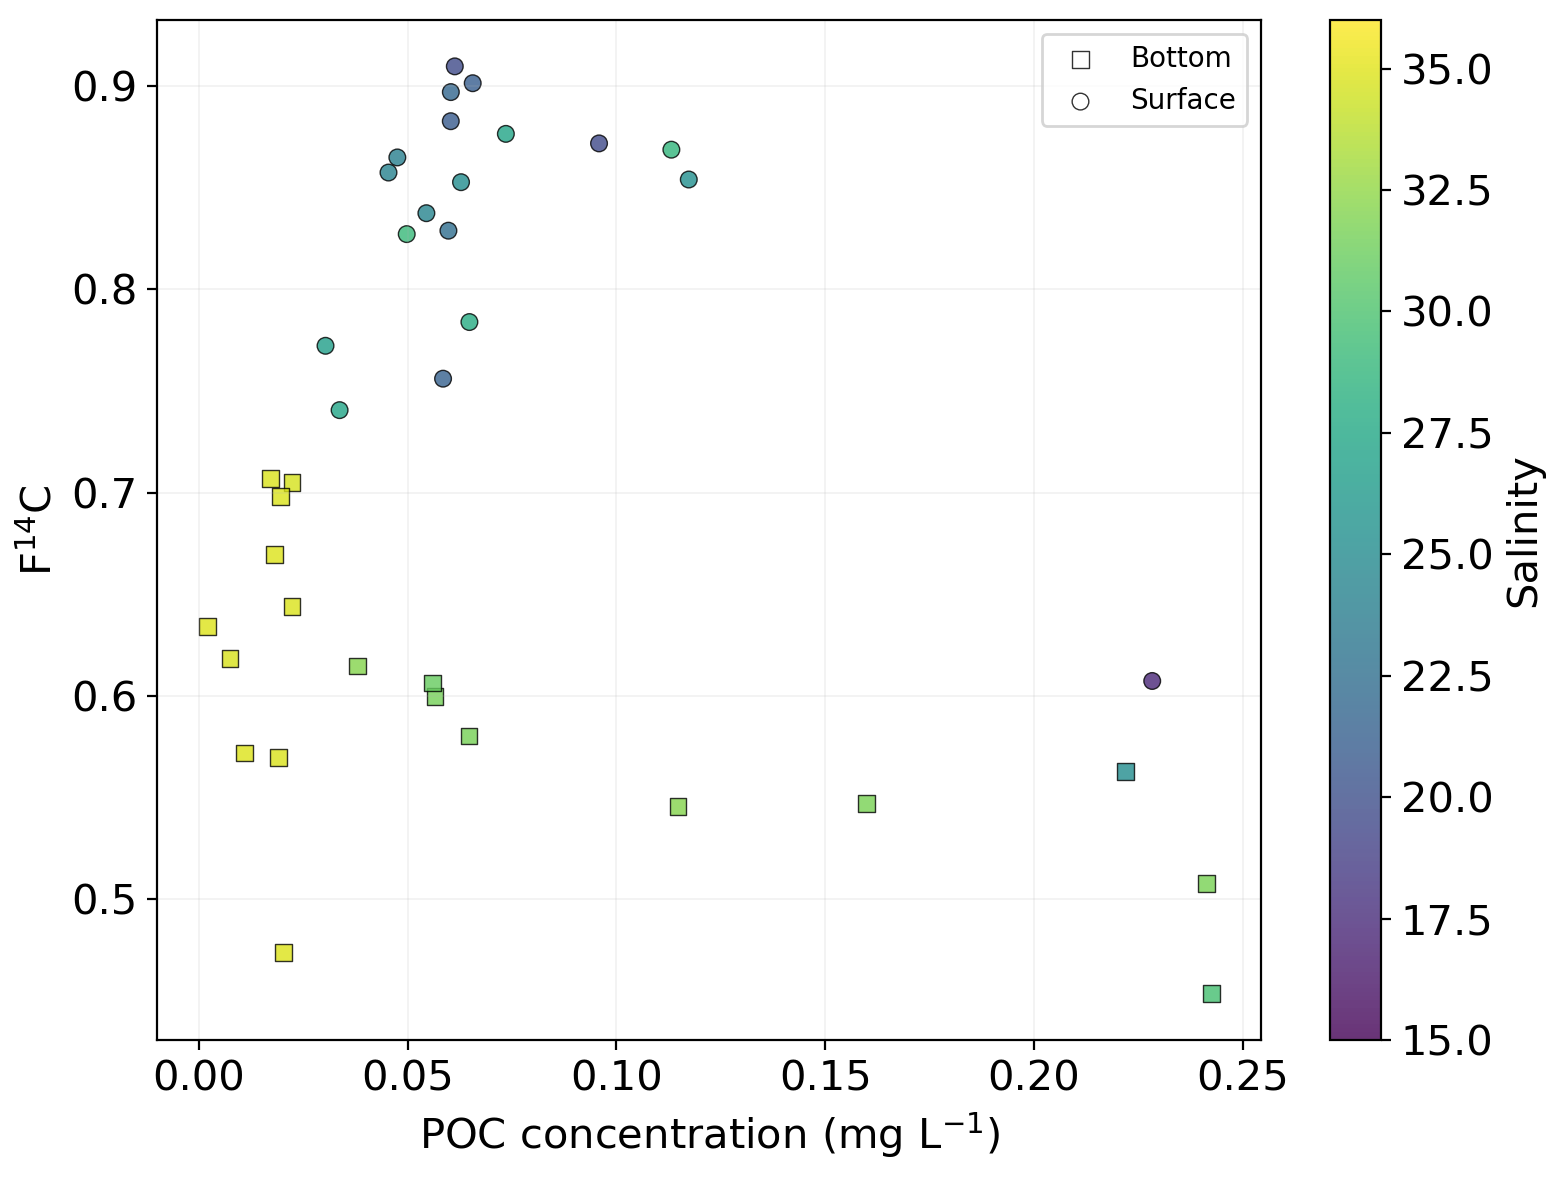

In [329]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(8,6), dpi=200,sharex =True)
f.patch.set_facecolor('w')
sizes=Depth


scatter=ax1.scatter(np.where(DepthName=='Bottom', POC_conc, np.nan ),np.where(DepthName=='Bottom', POC_F14C, np.nan ), 
                    c= np.where(DepthName=='Bottom', Salinity, np.nan ), marker='s', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=15, vmax=36, cmap=plt.cm.viridis, label='Bottom')

scatter=ax1.scatter(np.where(DepthName=='Surface', POC_conc, np.nan ),np.where(DepthName=='Surface', POC_F14C, np.nan ), 
                    c= np.where(DepthName=='Surface', Salinity, np.nan ), marker='o', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=15, vmax=36, cmap=plt.cm.viridis, label='Surface')
#scatter=ax1.scatter(POC_conc,POC_F14C, 
#                    c= Salinity, marker='o', edgecolor='k', 
#                    lw=0.5, alpha=0.8, vmin=0.02, vmax=0.03, cmap=plt.cm.viridis)

#ax1.set_xlabel('DOC (mg L$^{-1}$)', fontsize=15)
ax1.set_xlabel('POC concentration (mg L$^{-1}$)', fontsize=15)
ax1.set_ylabel('F$^{14}$C', fontsize=15)

cbar = plt.colorbar(scatter)
cbar.set_label('Salinity', fontsize=15)
cbar.ax.tick_params(labelsize=15)

ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_xlim(16,37)
#ax1.set_ylim(0.5,2.7)
#aromaticity
#portion of humic matter
ax1.grid(lw=0.1)
ax1.legend()

plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_f14c_POC.png", dpi=200)

In [294]:
np.nanmin(OC_PERC[:-3])

0.71

In [335]:
np.nanmean(OC_PERC[:-3])

1.2825

In [369]:
#OC_PERC[:-3] *= 255.0/OC_PERC[:-3].max() 

OC_PERC_norm=(OC_PERC - np.min(OC_PERC)) / (np.max(OC_PERC) - np.min(OC_PERC))

In [370]:
np.nanmax(OC_PERC_norm)

1.0

In [375]:
np.nanmax(OC_PERC)

1.61

In [390]:
OC_PERC[:-3]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
355     NaN
356     NaN
357     NaN
358     NaN
359    1.09
Name: OC%, Length: 360, dtype: float64

# d13c f14c muc

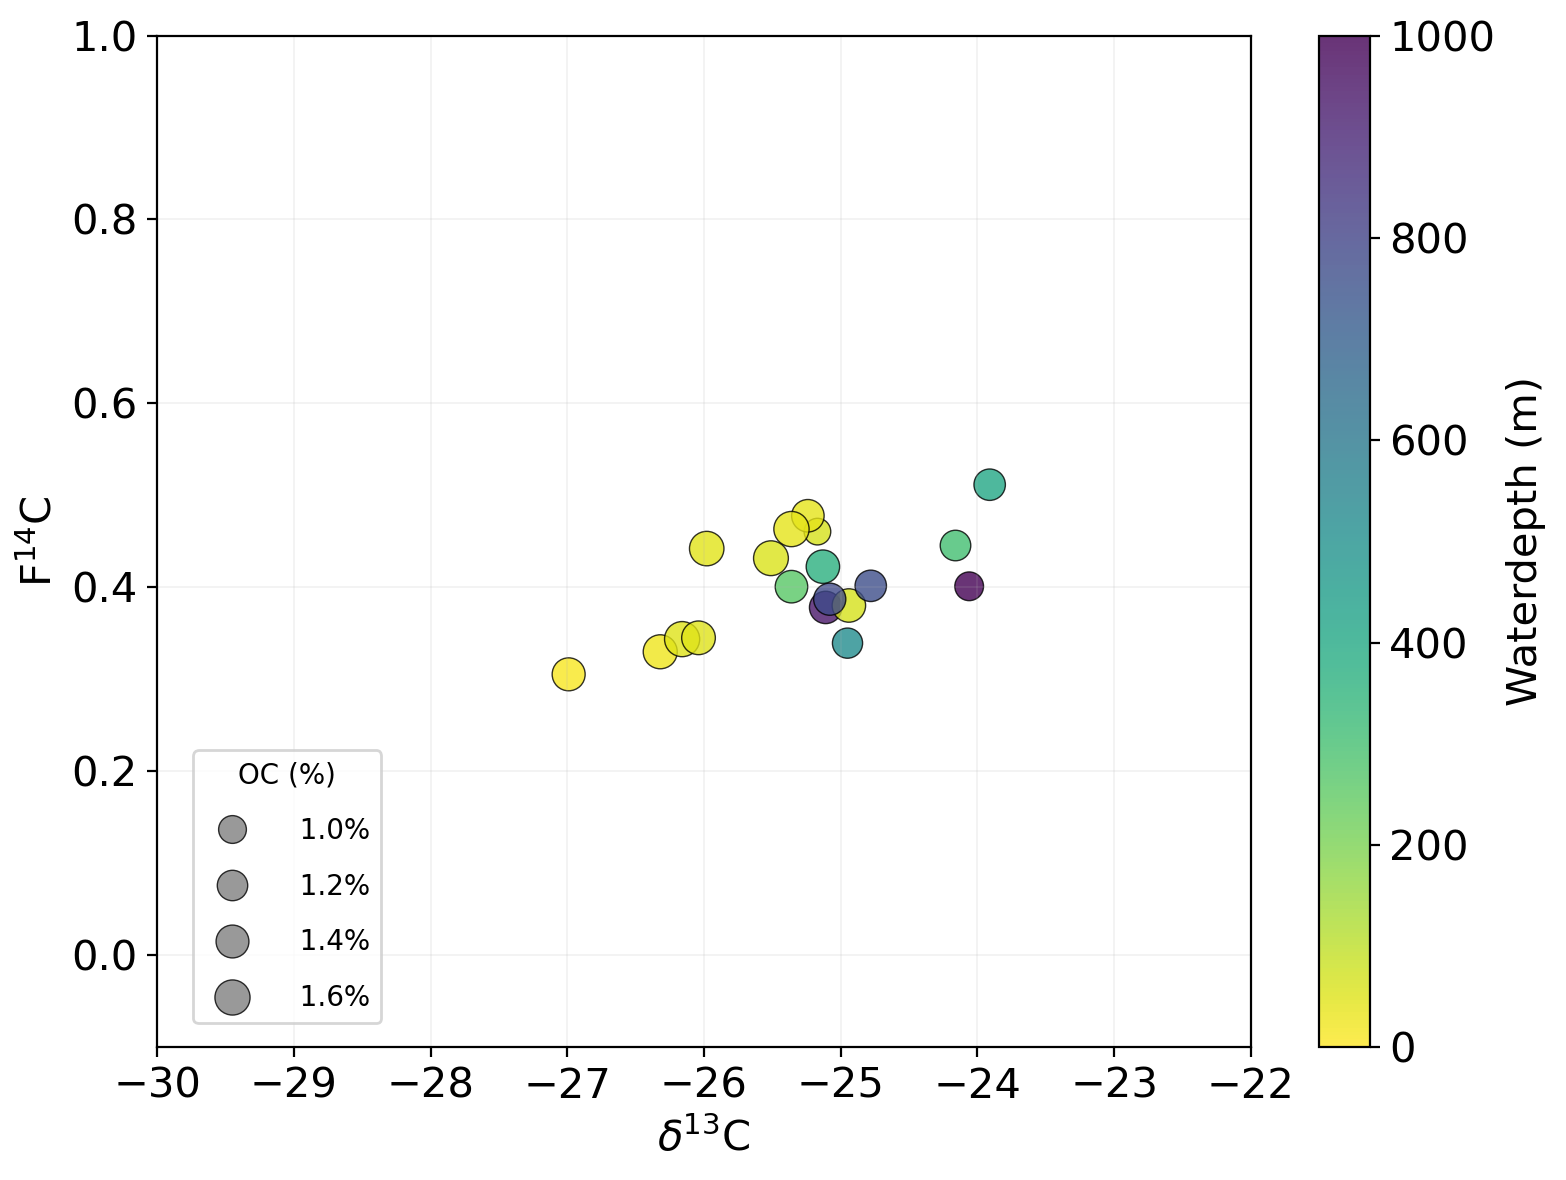

In [417]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(8,6), dpi=200,sharex =True)
f.patch.set_facecolor('w')
sizes=Depth


MUC_d13C_nan = np.array(MUC_d13C[:-3])[~np.isnan(f14C[:-3])]
MUC_f14C_nan = np.array(f14C[:-3])[~np.isnan(f14C[:-3])]
MUC_OC_PERC_nan = np.array(OC_PERC[:-3])[~np.isnan(f14C[:-3])]
MUC_Depth = np.array(Depth[:-3])[~np.isnan(f14C[:-3])]

#scatter=ax1.scatter(MUC_d13C[:-3], f14C[:-3],s=OC_PERC[:-3], c=Salinity[:-3], marker='o', edgecolor='k',
#                    lw=0.5, alpha=0.8, vmin=15, vmax=36, cmap=plt.cm.viridis)
scatter=ax1.scatter(MUC_d13C_nan[:-3], MUC_f14C_nan[:-3],s=MUC_OC_PERC_nan[:-3]*100, c=MUC_Depth[:-3], marker='o', edgecolor='k',
                    lw=0.5, alpha=0.8, vmin=0, vmax=1000, cmap=plt.cm.viridis_r)


#scatter=ax1.scatter(np.where(DepthName=='Bottom', POC_conc, np.nan ),np.where(DepthName=='Bottom', f14C, np.nan ), 
#                    c= np.where(DepthName=='Bottom', Salinity, np.nan ), marker='o', edgecolor='k', 
#                    lw=0.5, alpha=0.8, vmin=0.02, vmax=0.03, cmap=plt.cm.viridis)

#ax1.set_xlabel('DOC (mg L$^{-1}$)', fontsize=15)
ax1.set_xlabel(u"$\delta$$^{13}$C", fontsize=15)
ax1.set_ylabel('F$^{14}$C', fontsize=15)

cbar = plt.colorbar(scatter)
#cbar.set_label('Salinity', fontsize=15)
cbar.set_label('Waterdepth (m)', fontsize=15)
cbar.ax.tick_params(labelsize=15)

kw = dict(prop="sizes", num=5, color='grey', fmt="  {x:.1f}%",markeredgewidth=0.5, markeredgecolor='k',func=lambda s: s/100)

handles, labels = scatter.legend_elements(**kw)

legend2 = ax1.legend(*scatter.legend_elements(**kw),bbox_to_anchor=(0.02, 0.01),
                    loc="lower left", title="OC (%)",markerscale=1,labelspacing=1)


ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlim(-30,-22)
ax1.set_ylim(-0.1,1)
#aromaticity
#portion of humic matter
ax1.grid(lw=0.1)

plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Sed_d13c_f14c_OC_label.png", dpi=200)

In [398]:
MUC_d13C_nan

array([-23.91, -24.16, -24.06, -24.95, -25.17, -25.24, -25.36, -25.51,
       -25.11, -24.94, -25.98, -26.32, -26.16, -25.08, -26.04, -26.99,
       -25.36, -25.13, -24.78, -24.98, -25.63, -25.24])

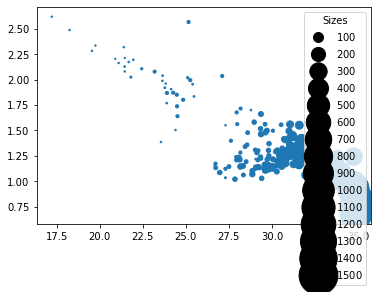

In [117]:

fig, ax1 = plt.subplots()
scatter=ax1.scatter(Salinity, SUVA254, s=Depth)

handles, labels = scatter.legend_elements(prop="sizes")
legnd = ax1.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

1.618

# TOC / POC / DOC

In [178]:
fraction_diss = []
for i, e in enumerate(TOC_conc):
    fraction_diss.append(DOC_conc[i] / e)

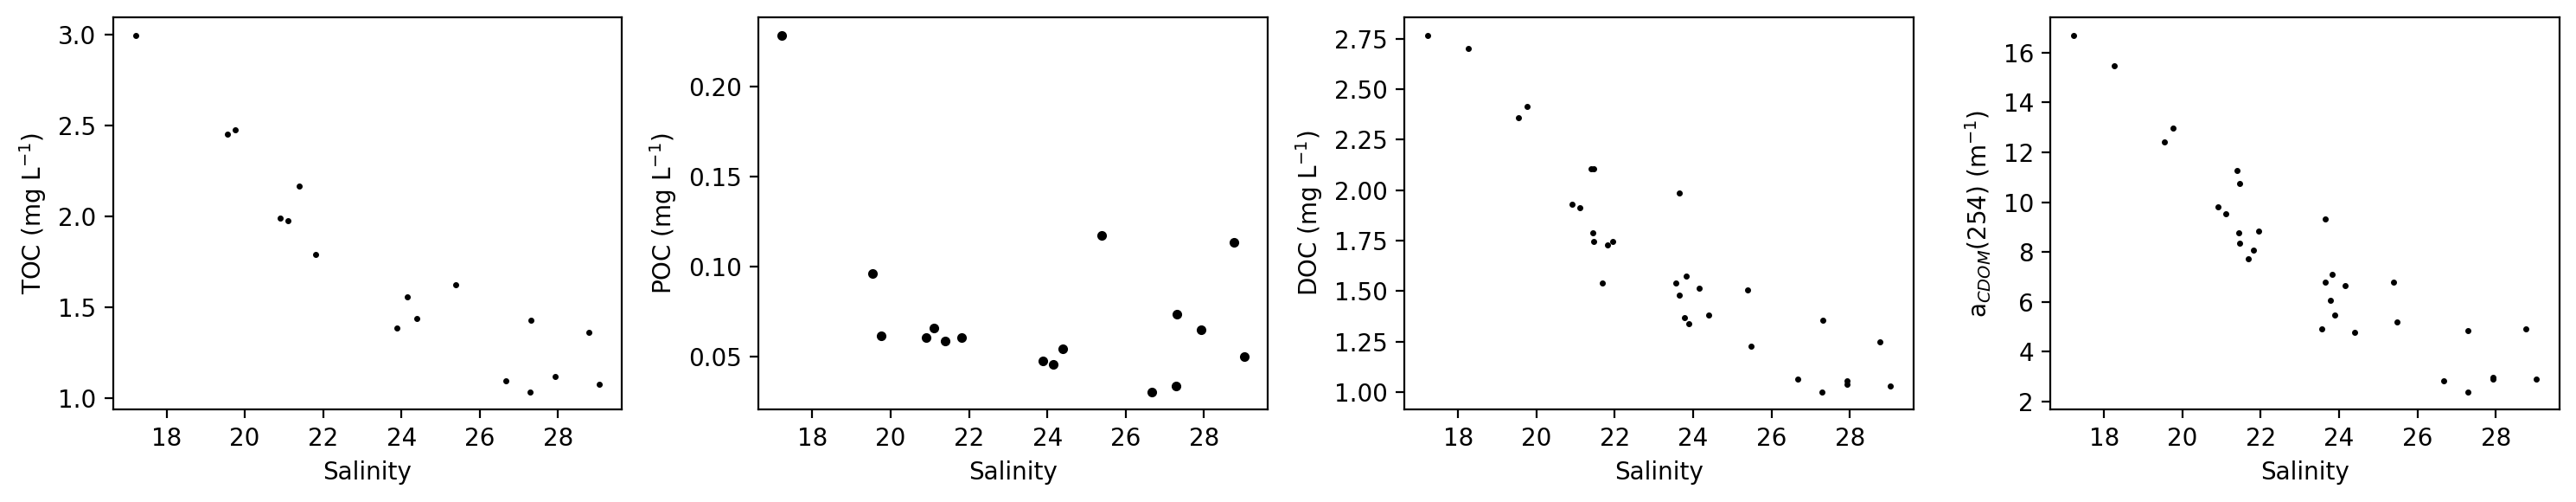

In [195]:
f, ((ax1, ax2, ax3, ax4 )) = plt.subplots(1, 4,figsize=(15,3), dpi=200,sharex =True)
f.patch.set_facecolor('w')


ax1.plot(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, TOC_conc,np.nan), "k.", markersize=3)
ax1.set_ylabel("TOC (mg L$^{-1}$)")
ax1.set_xlabel('Salinity')

ax2.plot(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, POC_conc,np.nan), 'k.')
ax2.set_ylabel("POC (mg L$^{-1}$)")
ax2.set_xlabel('Salinity')

ax3.plot(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, DOC_conc,np.nan), "k.", markersize=3)
ax3.set_ylabel("DOC (mg L$^{-1}$)")
ax3.set_xlabel('Salinity')

ax4.plot(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, CDOM254,np.nan), "k.", markersize=3)
ax4.set_ylabel("a$_{CDOM}$(254) (m$^{-1}$)")
ax4.set_xlabel('Salinity')

plt.tight_layout()

plt.savefig("/isipd/projects/p_PeCaBeau/Water_OM.png", dpi=200)

/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  app.launch_new_instance()


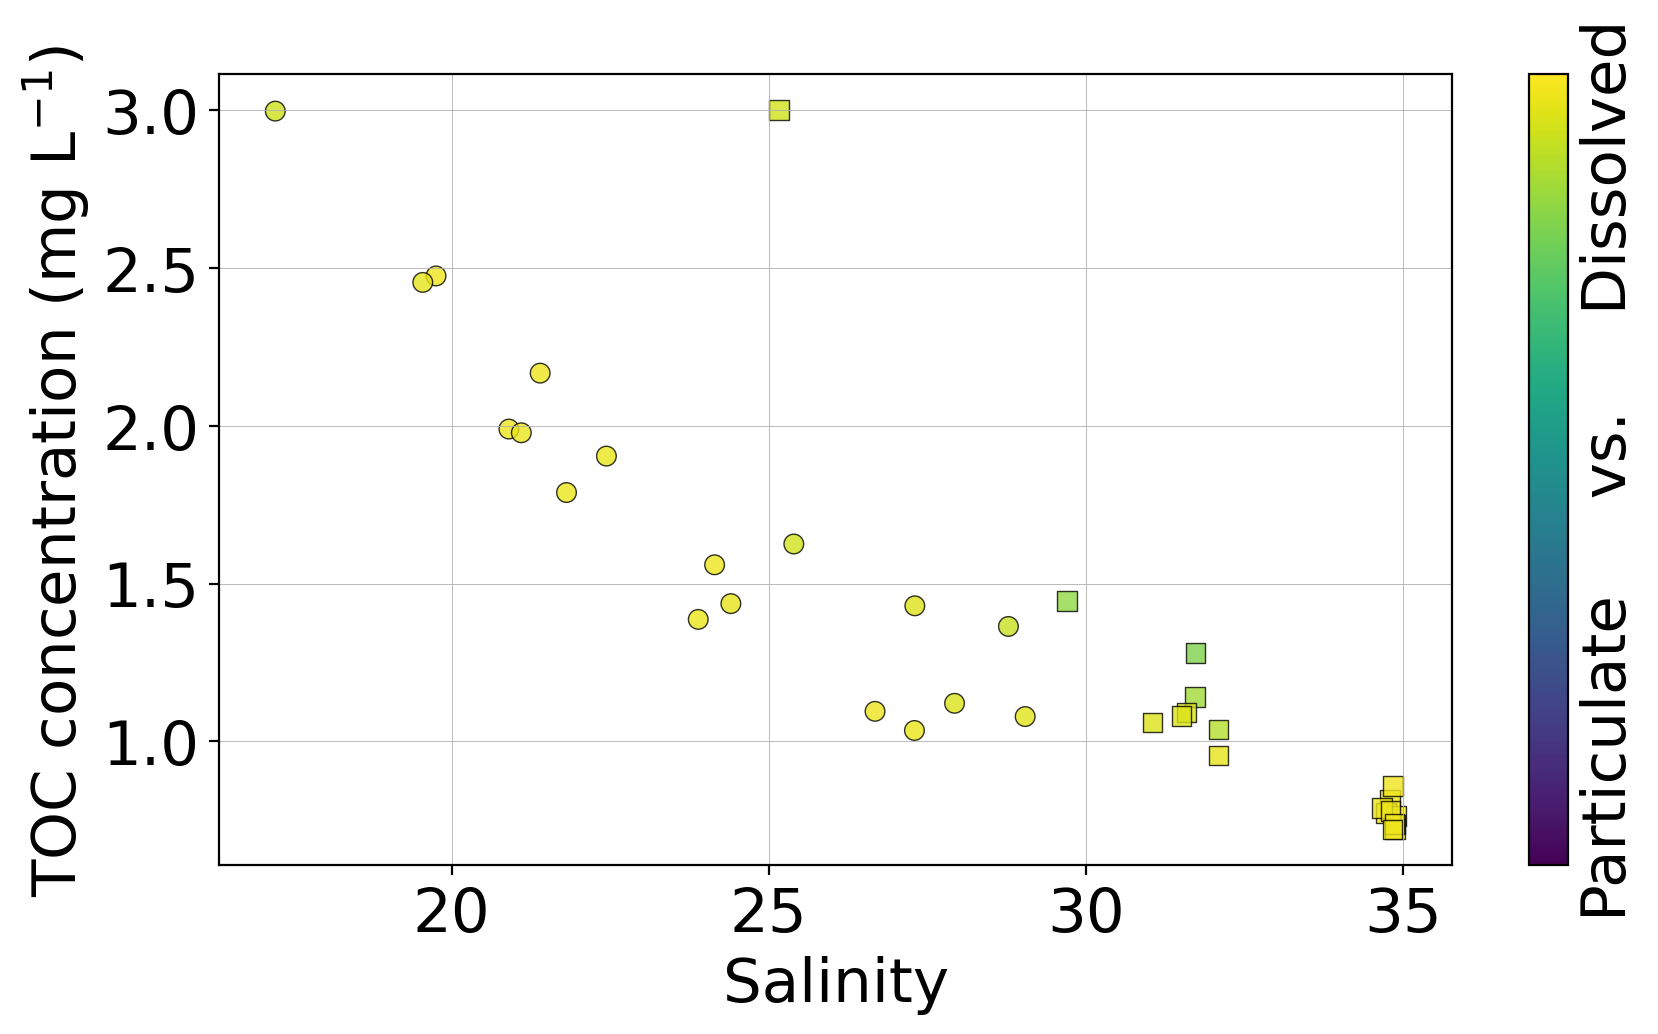

In [388]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(9,5), dpi=200,sharex =True)
f.patch.set_facecolor('w')

scatter=ax1.scatter(np.where(DepthName=='Bottom', Salinity, np.nan ),np.where(DepthName=='Bottom', TOC_conc, np.nan ), 
                    c= np.where(DepthName=='Bottom', np.array(fraction_diss)*100, np.nan ), marker='s', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=0, vmax=100, cmap=plt.cm.viridis, label='Bottom', s=50)

scatter=ax1.scatter(np.where(DepthName=='Surface', Salinity, np.nan ),np.where(DepthName=='Surface', TOC_conc, np.nan ), 
                    c= np.where(DepthName=='Surface', np.array(fraction_diss)*100, np.nan ), marker='o', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=0, vmax=100, cmap=plt.cm.viridis, label='Surface', s=50)



#sc = ax1.scatter(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, DOC_conc,np.nan) , marker='o', c="k", s=15, edgecolor="k", lw=0.4, vmin=1000, vmax=4000)

cbar = plt.colorbar(sc)
cbar.set_label('Particulate     vs.     Dissolved', fontsize=22)
cbar.ax.tick_params(labelsize=22)



ax1.set_ylabel("TOC concentration (mg L$^{-1}$)", fontsize=22)
ax1.set_xlabel("Salinity", fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=22)
cbar.set_ticks([])
ax1.grid(lw=0.3)
plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_SalinityvsTOC_all.png", dpi=200)

# DOC vs CDOM

/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  app.launch_new_instance()


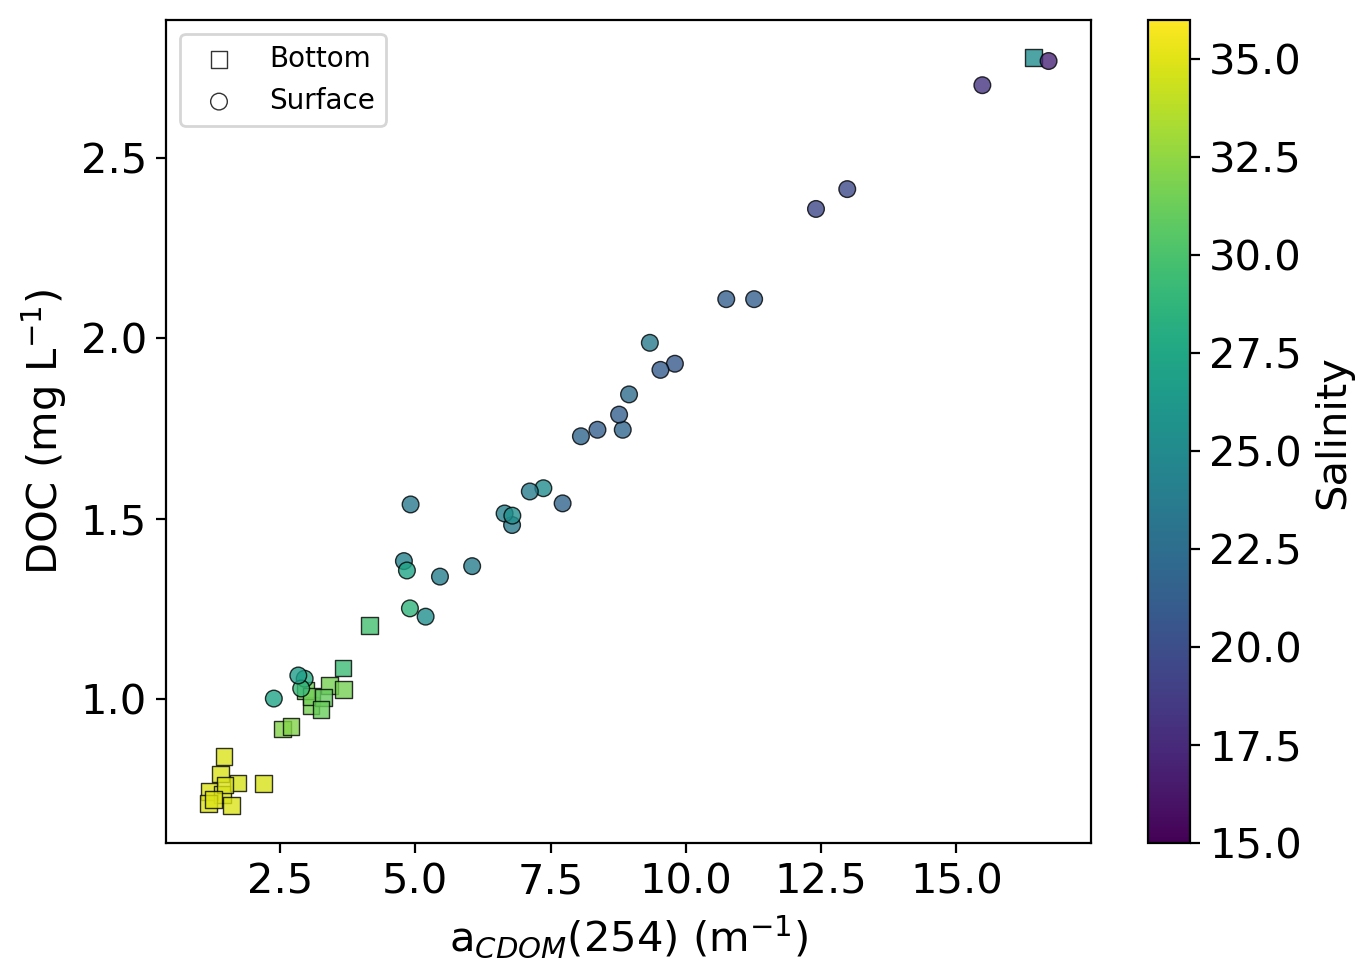

In [380]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200,sharex =True)
f.patch.set_facecolor('w')

scatter=ax1.scatter(np.where(DepthName=='Bottom', CDOM254, np.nan ),np.where(DepthName=='Bottom', DOC_conc, np.nan ), 
                    c= np.where(DepthName=='Bottom', Salinity, np.nan ), marker='s', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=15, vmax=36, cmap=plt.cm.viridis, label='Bottom')

scatter=ax1.scatter(np.where(DepthName=='Surface', CDOM254, np.nan ),np.where(DepthName=='Surface', DOC_conc, np.nan ), 
                    c= np.where(DepthName=='Surface', Salinity, np.nan ), marker='o', edgecolor='k', 
                    lw=0.5, alpha=0.8, vmin=15, vmax=36, cmap=plt.cm.viridis, label='Surface')



#sc = ax1.scatter(np.where(Depth<5, Salinity,np.nan), np.where(Depth<5, DOC_conc,np.nan) , marker='o', c="k", s=15, edgecolor="k", lw=0.4, vmin=1000, vmax=4000)

cbar = plt.colorbar(sc)
cbar.set_label('Salinity', fontsize=15)
cbar.ax.tick_params(labelsize=15)



ax1.set_xlabel("a$_{CDOM}$(254) (m$^{-1}$)", fontsize=15)
ax1.set_ylabel("DOC (mg L$^{-1}$)", fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
ax1.legend()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_CDOMvsDOC.png", dpi=200)

In [ ]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(5,3), dpi=200,sharex =True)
f.patch.set_facecolor('w')


sc = ax1.scatter(Salinity, TOC_conc, c=fraction_diss, s=15, edgecolor="k", lw=0.4)
ax1.set_ylabel("TOC (mg/L)")
ax1.set_xlabel("Salinity")

cbar = plt.colorbar(sc)
cbar.set_label('f$_{dissolved}$', fontsize=6)
cbar.ax.tick_params(labelsize=6)

# mass balance

In [ ]:
River water 0 / -20
Sea-ice meltwater 4 / -2
Seawater 34.8 / 0.28

In [ ]:
#river, melt, marine 
a = np.array([[1,1,1], [0, 4, 34.8], [-20, -2, 0.28]])

fraction_all3=[]
friver=[]
fsim=[]
fsw=[]

for i, e in enumerate(Salinity):
    b = np.array([1, e, d18O[i]])
    x = np.linalg.solve(a, b)
    friver.append(x[0])
    fsim.append(x[1])
    fsw.append(x[2])   
    fraction_all3.append(x*100)

In [ ]:
f, ((ax1 )) = plt.subplots(1, 1,figsize=(5,3), dpi=200,sharex =True)
f.patch.set_facecolor('w')

sc = ax1.scatter(friver, DOC_conc, c=fraction_diss, s=15, edgecolor="k", lw=0.4)
ax1.set_ylabel("TOC (mg/L)")
ax1.set_xlabel("friver")

cbar = plt.colorbar(sc)
cbar.set_label('f$_{dissolved}$', fontsize=6)
cbar.ax.tick_params(labelsize=6)

In [ ]:
f, ((ax1, ax2 )) = plt.subplots(1, 2,figsize=(10,3), dpi=200,sharex =False)
f.patch.set_facecolor('w')


sc = ax1.scatter(Salinity, TOC_conc, c=fsim, s=15, edgecolor="k", lw=0.4)
ax1.set_ylabel("TOC (mg/L)")
ax1.set_xlabel("Salinity")
ax1.set_xlim(15,35)

cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label('f$_{SIM}$', fontsize=6)
cbar.ax.tick_params(labelsize=6)

sc2= ax2.scatter(friver, TOC_conc, c=Depth, s=15, edgecolor="k", lw=0.4, vmin=0, vmax=100)
ax2.set_ylabel("TOC (mg/L)")
ax2.set_xlabel('f$_{rw}$')
ax2.set_xlim(0.6, 0)

cbar2 = plt.colorbar(sc2, ax=ax2)
cbar2.set_label('Depth (m)', fontsize=6)
cbar2.ax.tick_params(labelsize=6)

# Maps

In [244]:
import xarray
xds = xarray.open_dataset(r"/isipd/projects/p_ESACCIARCTICOM/rasterout.tif")
#x]ds["band_data".rio.to_raster("/isipd/projects/p_ESACCIARCTICOM/rasterout_NC.nc")
lon_var_IBCAO = np.array(xds["x"])
lat_var_IBCAO = np.array(xds["y"])
IBCAO = np.array(xds["band_data"][0])

In [245]:
lon_sub = lon_var_IBCAO[3500:8000]
lat_sub = lat_var_IBCAO[2000:3100]
IBCAO_sub = IBCAO[2000:3100,3500:8000]

# read sea ice conc

In [218]:
import xarray
xds1 = xarray.open_dataset(r"/isipd/projects/p_PeCaBeau/01_data/Satellite/seaice/ice_conc_nh_ease-125_multi_202110011200.nc")
geotiff_da = xarray.open_rasterio(r"/isipd/projects/p_PeCaBeau/01_data/Satellite/seaice/asi-AMSR2-n3125-20211003-v5.4.tif")
xds1

xds1_dat = geotiff_da.to_dataset('band')
xds1_dat

/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.Dataset>
Dimensions:  (y: 3584, x: 2432)
Coordinates:
  * y        (y) float64 5.848e+06 5.845e+06 5.842e+06 ... -5.345e+06 -5.348e+06
  * x        (x) float64 -3.848e+06 -3.845e+06 ... 3.745e+06 3.748e+06
Data variables:
    1        (y, x) uint8 ...
Attributes: (12/18)
    transform:                 (3125.0, 0.0, -3850000.0, 0.0, -3125.0, 585000...
    crs:                       
    res:                       (3125.0, 3125.0)
    is_tiled:                  0
    nodatavals:                (nan,)
    scales:                    (1.0,)
    ...                        ...
    x#long_name:               x
    y#actual_range:            {0.5,3583.5}
    y#long_name:               y
    z#actual_range:            {0,120}
    z#long_name:               z
    z#_FillValue:              nan

In [187]:
#x]ds["band_data".rio.to_raster("/isipd/projects/p_ESACCIARCTICOM/rasterout_NC.nc")
lon_var_sic = np.array(xds1["lon"])
lat_var_sic = np.array(xds1["lat"])
sic = np.array(xds1["ice_conc"])

In [220]:
lon_var_sic = np.array(xds1_dat["x"])
lat_var_sic = np.array(xds1_dat["y"])
sic = np.array(xds1_dat[1])

In [222]:
inProj = Proj(init='epsg:3413')
outProj = Proj(init='epsg:4326')
x1,y1 = lon_var_sic, lat_var_sic

lon,lat = np.meshgrid(x1,y1)
lon_var_4326, lat_var_4326 = transform(inProj,outProj,lon,lat)


/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [43]:
#sic_valid = np.where(sic>5, np.where(sic<101, sic, np.nan), np.nan)

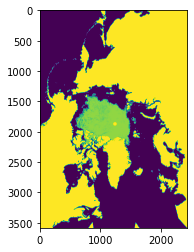

In [223]:
plt.imshow(sic)

In [51]:
#lon_var_sic[500:1000]

In [203]:
lon_var_sic[lon_var_sic < 0] += 360

In [224]:

lon_var_4326[lon_var_4326 < 0] += 360


/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


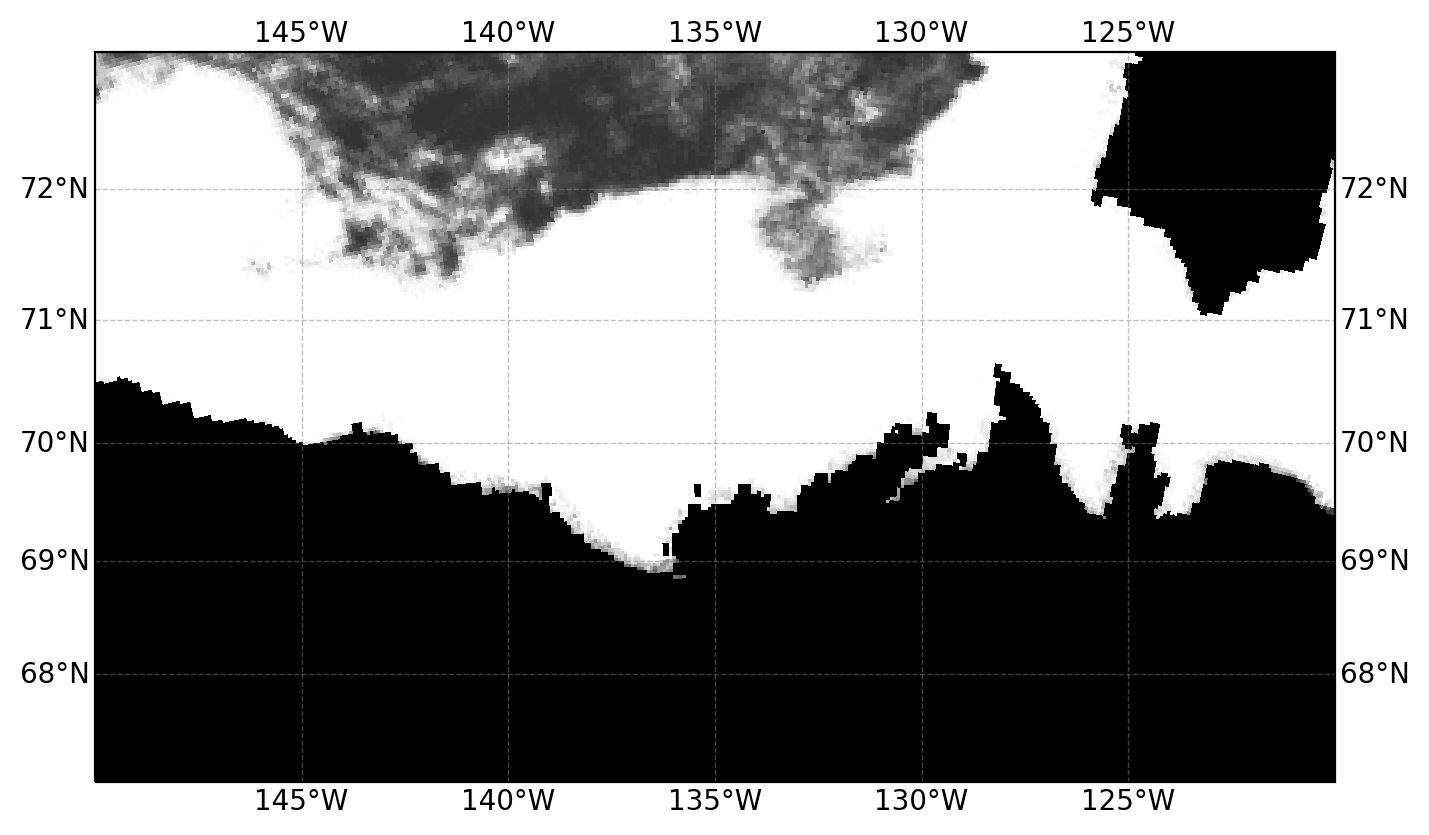

In [225]:
fig1 = plt.figure(figsize=(8, 6), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())
m.set_extent([-150, -120, 67, 73], crs=ccrs.PlateCarree())
#transform = ccrs.PlateCarree()
f1 = m.pcolormesh(lon_var_4326, lat_var_4326,np.where(sic>5, sic, np.nan), shading='auto',
                    cmap=plt.cm.Greys, alpha=1,transform = ccrs.PlateCarree())
#f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
#                    transform = ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=plt.cm.copper)
m.add_feature(cartopy.feature.LAND)
g1 = m.gridlines(linewidth=0.5,color='gray', alpha=0.5, linestyle='--', 
                 draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

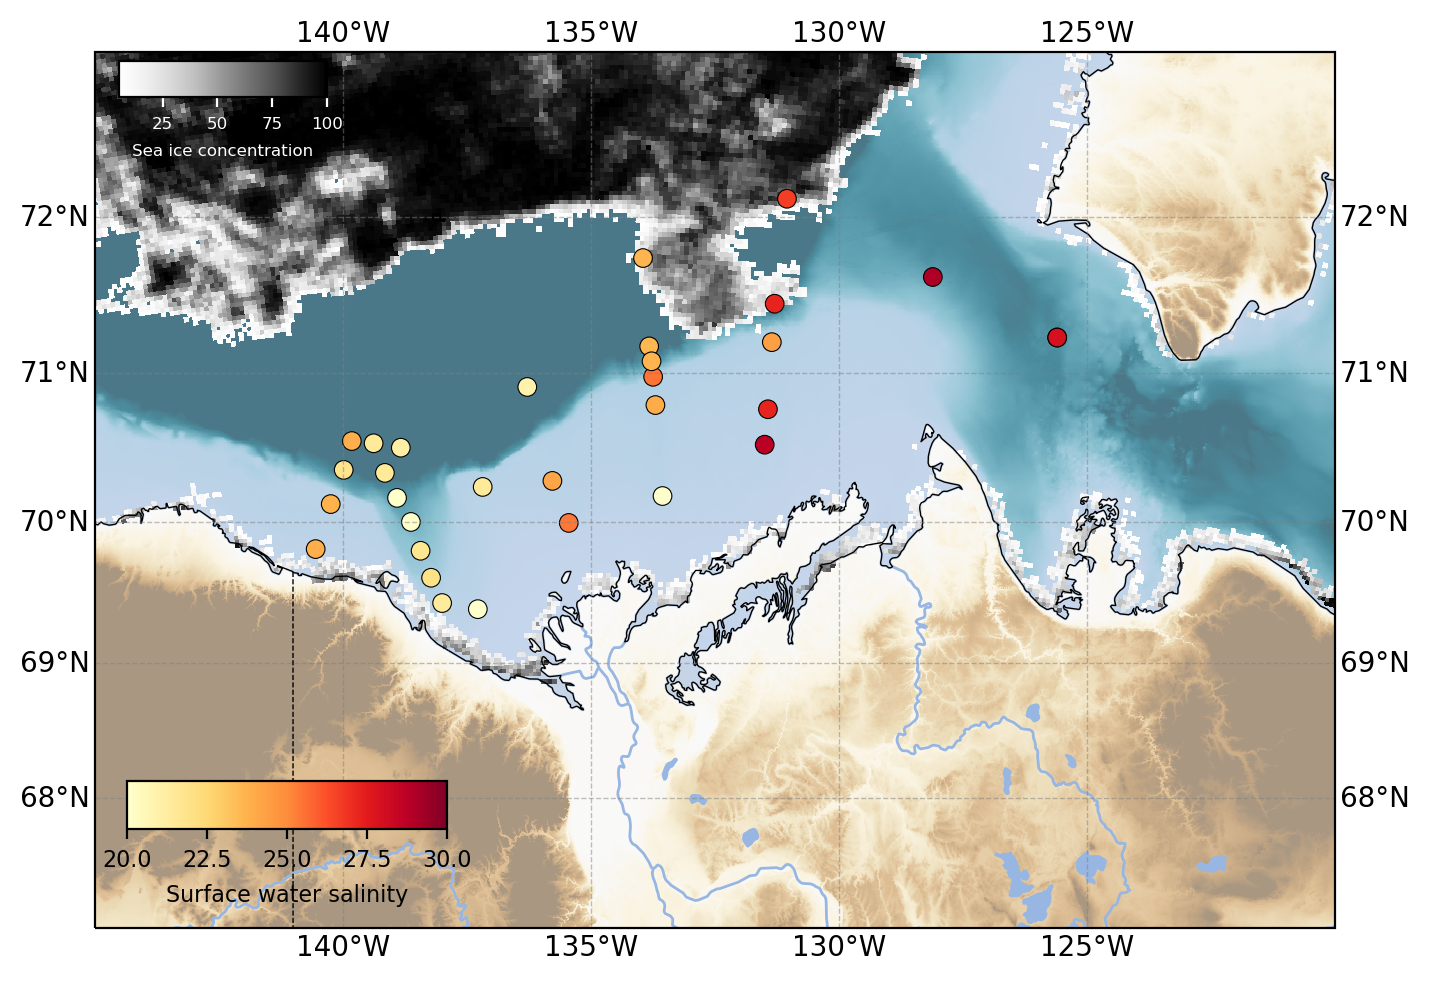

In [241]:


fig1 = plt.figure(figsize=(8, 6), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())
m.set_extent([-145, -120, 67, 73], crs=ccrs.PlateCarree())

f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
                    transform = ccrs.PlateCarree(), vmin=-500, vmax=500, cmap=plt.cm.BrBG_r, alpha=0.5)
#f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
#                    transform = ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=plt.cm.copper)


#m.add_feature(cartopy.feature.LAND)
m.add_feature(cartopy.feature.RIVERS)
m.coastlines(resolution='10m', color='k', linewidth=0.5)
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAKES)
m.add_feature(cartopy.feature.BORDERS, linestyle='--', lw=0.5)
f1 = m.pcolormesh(lon_var_4326, lat_var_4326,np.where(sic>=5, np.where(sic<101, sic, np.nan), np.nan), shading='auto',
                    cmap=plt.cm.Greys, alpha=1,transform = ccrs.PlateCarree(), alpha=0.8)
g1 = m.gridlines(linewidth=0.5,color='gray', alpha=0.5, linestyle='--', draw_labels=True, dms=True, x_inline=False, y_inline=False)
#g1.xlabel_style = {'size': 15, 'color': 'gray'}

np.where(Depth<5, Lon, np.nan )

sc = m.scatter(np.where(Depth<5, Lon, np.nan ), np.where(Depth<5, Lat, np.nan ), c= np.where(Depth<5, Salinity, np.nan ), transform = ccrs.PlateCarree(), vmin=20, vmax=30, edgecolor="k", lw=0.4, s=45,
               cmap=plt.cm.YlOrRd)

cbar_ax = fig1.add_axes([0.145, 0.22, 0.2, 0.04])

cbar2 = plt.colorbar(sc, cax= cbar_ax, ax=m,orientation="horizontal")
cbar2.set_label('Surface water salinity', fontsize=8, c="k")
cbar2.ax.tick_params(labelsize=8, colors="k")

cbar_ax = fig1.add_axes([0.14, 0.83, 0.13, 0.03])
cbar_sic = plt.colorbar(f1, cax= cbar_ax, ax=m,orientation="horizontal")
cbar_sic.set_label('Sea ice concentration', fontsize=6, c="white")
cbar_sic.ax.tick_params(labelsize=6, colors="w")
#cbar2.ax.xaxis.label.set_color('red')

#plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_Salinity.png", dpi=200)

# TOC MAP

In [249]:
Lon_bottom = Lon + 0.2
Lon_bottom

0     -133.49872
1     -133.49872
2     -133.49872
3     -133.54497
4     -133.54497
         ...    
358   -140.34852
359   -140.34852
360          NaN
361          NaN
362          NaN
Name: Longitude, Length: 363, dtype: float64

/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


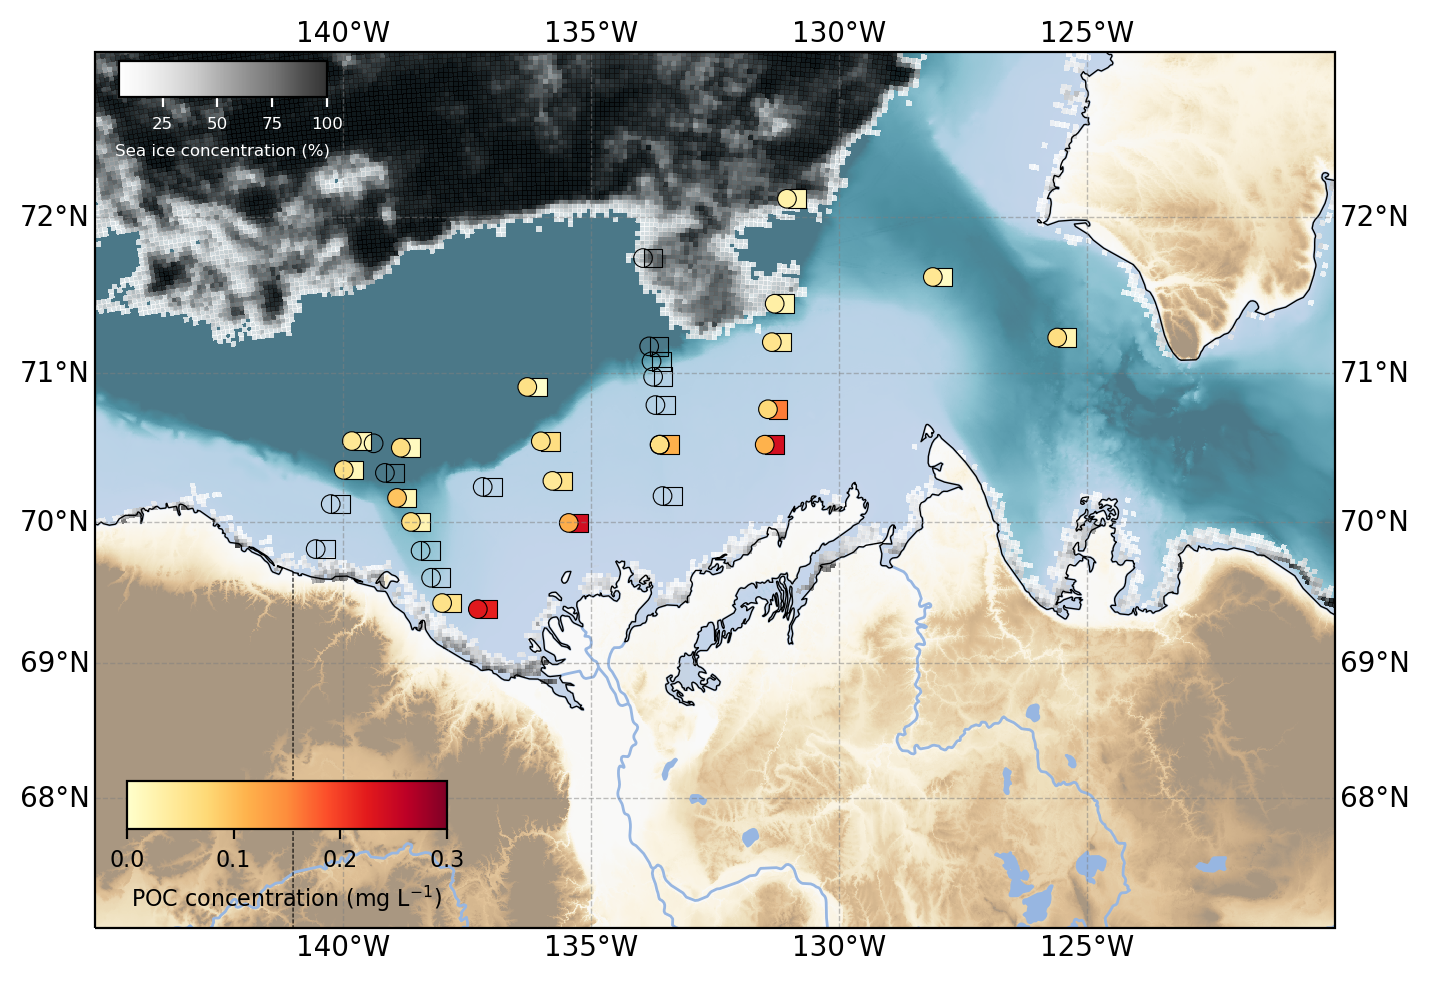

In [255]:
import cartopy.crs as ccrs
import cartopy

fig1 = plt.figure(figsize=(8, 6), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())
m.set_extent([-145, -120, 67, 73], crs=ccrs.PlateCarree())

f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
                    transform = ccrs.PlateCarree(), vmin=-500, vmax=500, cmap=plt.cm.BrBG_r, alpha=0.5)
#f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
#                    transform = ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=plt.cm.copper)


#m.add_feature(cartopy.feature.LAND)
m.add_feature(cartopy.feature.RIVERS)
m.coastlines(resolution='10m', color='k', linewidth=0.5)
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAKES)
m.add_feature(cartopy.feature.BORDERS, linestyle='--', lw=0.4)

f1 = m.pcolormesh(lon_var_4326, lat_var_4326,np.where(sic>=5, np.where(sic<101, sic, np.nan), np.nan), shading='auto',
                    cmap=plt.cm.Greys, alpha=0.8,transform = ccrs.PlateCarree())


g1 = m.gridlines(linewidth=0.5,color='gray', alpha=0.5, linestyle='--', draw_labels=True, dms=True, x_inline=False, y_inline=False)
#g1.xlabel_style = {'size': 15, 'color': 'gray'}

np.where(Depth<5, Lon, np.nan )

sc = m.scatter(np.where(DepthName=='Bottom', Lon_bottom, np.nan ), np.where(DepthName=='Bottom', Lat, np.nan ), 
               c= np.where(DepthName=='Bottom', POC_conc, np.nan ), transform = ccrs.PlateCarree(), marker='s',
               vmin=0, vmax=0.3, edgecolor="k", lw=0.4, s=45,label='Bottom',
               cmap=plt.cm.YlOrRd)

sc = m.scatter(np.where(DepthName=='Surface', Lon, np.nan ), np.where(DepthName=='Surface', Lat, np.nan ), 
               c= np.where(DepthName=='Surface', POC_conc, np.nan ), transform = ccrs.PlateCarree(), 
               vmin=0, vmax=0.3, edgecolor="k", lw=0.4, s=45, label='Surface',
               cmap=plt.cm.YlOrRd)

#m.legend()

cbar_ax = fig1.add_axes([0.145, 0.22, 0.2, 0.04])

cbar2 = plt.colorbar(sc, cax= cbar_ax, ax=m,orientation="horizontal")
cbar2.set_label('POC concentration (mg L$^{-1}$)', fontsize=8, c="k")
cbar2.ax.tick_params(labelsize=8, colors="k")

cbar_ax = fig1.add_axes([0.14, 0.83, 0.13, 0.03])
cbar_sic = plt.colorbar(f1, cax= cbar_ax, ax=m,orientation="horizontal")
cbar_sic.set_label('Sea ice concentration (%)', fontsize=6, c="white")
cbar_sic.ax.tick_params(labelsize=6, colors="w")
#cbar2.ax.xaxis.label.set_color('red')

#plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_POC_bottom.png", dpi=200)

# DOC MAP

/home/pd/bjuhls/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


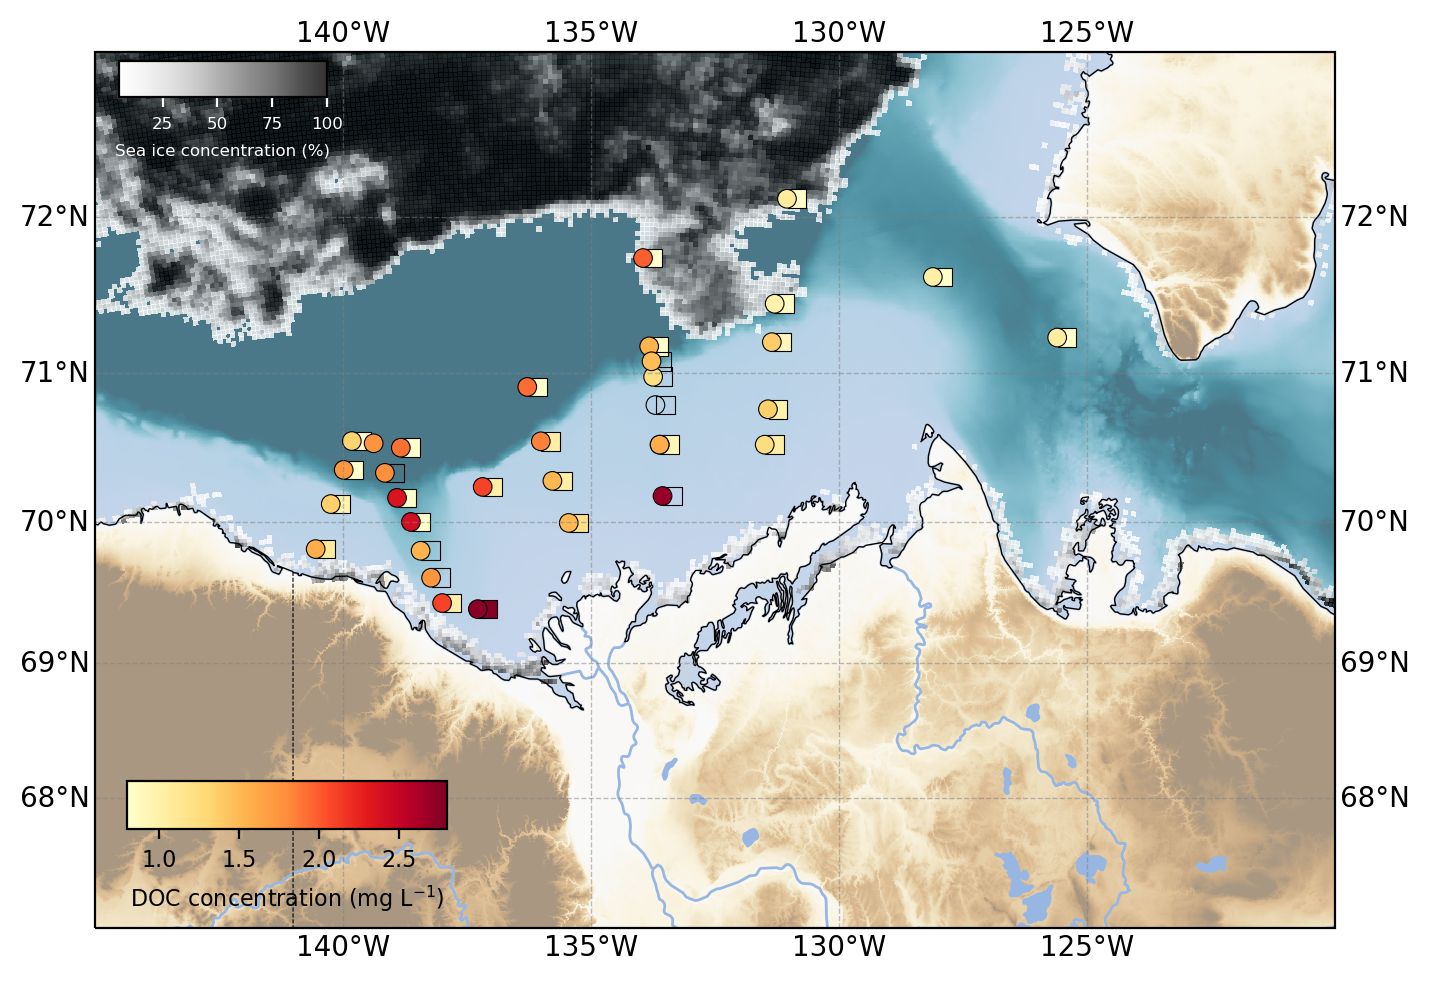

In [258]:
import cartopy.crs as ccrs
import cartopy

fig1 = plt.figure(figsize=(8, 6), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())
m.set_extent([-145, -120, 67, 73], crs=ccrs.PlateCarree())

f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
                    transform = ccrs.PlateCarree(), vmin=-500, vmax=500, cmap=plt.cm.BrBG_r, alpha=0.5)
#f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
#                    transform = ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=plt.cm.copper)


#m.add_feature(cartopy.feature.LAND)
m.add_feature(cartopy.feature.RIVERS)
m.coastlines(resolution='10m', color='k', linewidth=0.5)
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAKES)
m.add_feature(cartopy.feature.BORDERS, linestyle='--', lw=0.4)

f1 = m.pcolormesh(lon_var_4326, lat_var_4326,np.where(sic>=5, np.where(sic<101, sic, np.nan), np.nan), shading='auto',
                    cmap=plt.cm.Greys, alpha=0.8,transform = ccrs.PlateCarree())


g1 = m.gridlines(linewidth=0.5,color='gray', alpha=0.5, linestyle='--', draw_labels=True, dms=True, x_inline=False, y_inline=False)
#g1.xlabel_style = {'size': 15, 'color': 'gray'}

np.where(Depth<5, Lon, np.nan )

sc = m.scatter(np.where(DepthName=='Bottom', Lon_bottom, np.nan ), np.where(DepthName=='Bottom', Lat, np.nan ), 
               c= np.where(DepthName=='Bottom', DOC_conc, np.nan ), transform = ccrs.PlateCarree(), marker='s',
               vmin=0.8, vmax=2.8, edgecolor="k", lw=0.4, s=45,label='Bottom',
               cmap=plt.cm.YlOrRd)

sc = m.scatter(np.where(DepthName=='Surface', Lon, np.nan ), np.where(DepthName=='Surface', Lat, np.nan ), 
               c= np.where(DepthName=='Surface', DOC_conc, np.nan ), transform = ccrs.PlateCarree(), 
               vmin=0.8, vmax=2.8, edgecolor="k", lw=0.4, s=45, label='Surface',
               cmap=plt.cm.YlOrRd)

#m.legend()

cbar_ax = fig1.add_axes([0.145, 0.22, 0.2, 0.04])

cbar2 = plt.colorbar(sc, cax= cbar_ax, ax=m,orientation="horizontal")
cbar2.set_label('DOC concentration (mg L$^{-1}$)', fontsize=8, c="k")
cbar2.ax.tick_params(labelsize=8, colors="k")

cbar_ax = fig1.add_axes([0.14, 0.83, 0.13, 0.03])
cbar_sic = plt.colorbar(f1, cax= cbar_ax, ax=m,orientation="horizontal")
cbar_sic.set_label('Sea ice concentration (%)', fontsize=6, c="white")
cbar_sic.ax.tick_params(labelsize=6, colors="w")
#cbar2.ax.xaxis.label.set_color('red')

#plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Water_DOC_bottom.png", dpi=200)

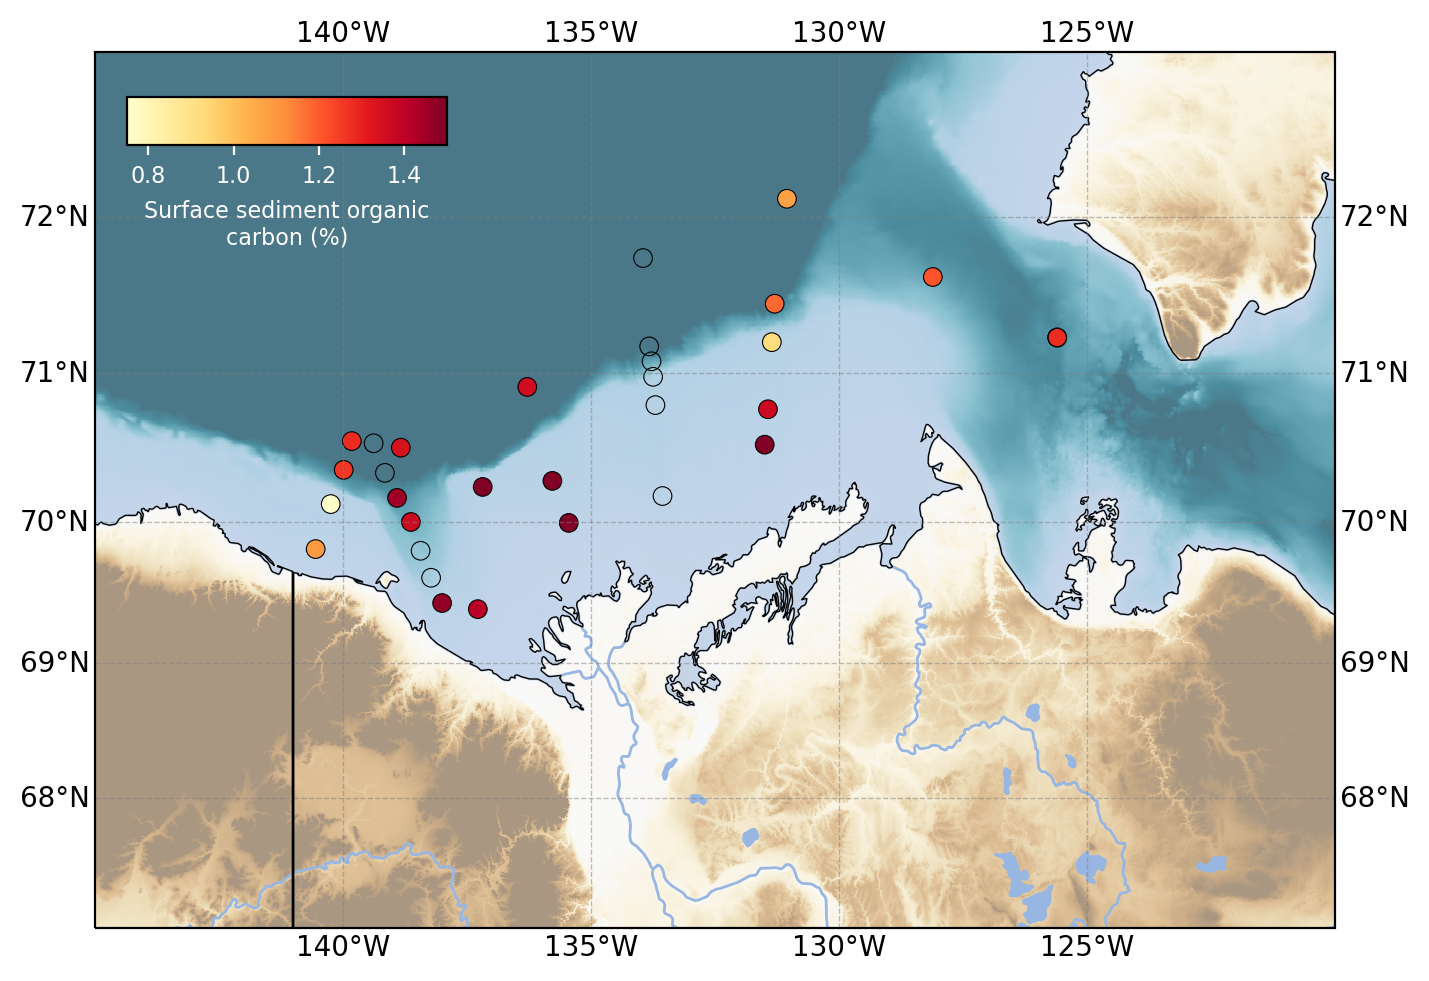

In [123]:
import cartopy.crs as ccrs
import cartopy

fig1 = plt.figure(figsize=(8, 6), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())
m.set_extent([-145, -120, 67, 73], crs=ccrs.PlateCarree())

f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
                    transform = ccrs.PlateCarree(), vmin=-500, vmax=500, cmap=plt.cm.BrBG_r, alpha=0.5)
#f1 = m.pcolormesh(lon_sub, lat_sub, IBCAO_sub, shading='auto',
#                    transform = ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=plt.cm.copper)


#m.add_feature(cartopy.feature.LAND)
m.add_feature(cartopy.feature.RIVERS)
m.coastlines(resolution='10m', color='k', linewidth=0.5)
m.add_feature(cartopy.feature.OCEAN)
m.add_feature(cartopy.feature.LAKES)
m.add_feature(cartopy.feature.BORDERS)

g1 = m.gridlines(linewidth=0.5,color='gray', alpha=0.5, linestyle='--', draw_labels=True, dms=True, x_inline=False, y_inline=False)
#g1.xlabel_style = {'size': 15, 'color': 'gray'}

np.where(Depth<5, Lon, np.nan )

sc = m.scatter(np.where(Depth<5, Lon, np.nan ), np.where(Depth<5, Lat, np.nan ), c= np.where(Depth<5, OC_PERC, np.nan ), transform = ccrs.PlateCarree(), vmin=0.75, vmax=1.5, edgecolor="k", lw=0.4, s=45,
               cmap=plt.cm.YlOrRd)

cbar_ax = fig1.add_axes([0.145, 0.79, 0.2, 0.04])

cbar2 = plt.colorbar(sc, cax= cbar_ax, ax=m,orientation="horizontal")
cbar2.set_label('Surface sediment organic\ncarbon (%)', fontsize=8, c="white")
cbar2.ax.tick_params(labelsize=8, colors="w")
#cbar2.ax.xaxis.label.set_color('red')

#plt.tight_layout()
plt.savefig("/isipd/projects/p_PeCaBeau/Sed_OC_Perc.png", dpi=200)

In [ ]:
import cartopy.crs as ccrs
import cartopy

fig1 = plt.figure(figsize=(4, 3), dpi=200)
fig1.patch.set_facecolor('w')

m = plt.axes(projection=ccrs.Mercator())

m.add_feature(cartopy.feature.RIVERS)
m.coastlines(resolution='10m', color='black', linewidth=0.5)

m.set_extent([-145, -120, 67, 73], crs=ccrs.PlateCarree())
g1 = m.gridlines(draw_labels = True, lw=0.1)

sc = m.scatter(np.where(Depth<15, np.nan, Lon), np.where(Depth<15, np.nan, Lat), c= np.where(Depth<15, np.nan, fraction_diss), transform = ccrs.PlateCarree())

#np.where(Depth>15, np.nan, fraction_diss)

cbar2 = plt.colorbar(sc, ax=m, fraction=0.035, pad=0.15)
cbar2.set_label('f$_{dissolved}$', fontsize=6)
cbar2.ax.tick_params(labelsize=6)

plt.tight_layout()


In [ ]:
CDOM_AWI_df = pd.read_csv("/isipd/projects/p_PeCaBeau/01_data/Water_parameters/final_csv/CDOM_AWI.csv", encoding="Windows-1252", sep=";")
DOC_df = pd.read_csv("/isipd/projects/p_PeCaBeau/01_data/Water_parameters/final_csv/DOC.csv", encoding="Windows-1252", sep=";")

DOC_df

In [ ]:
SUVA254 = (np.array(CDOM_AWI_df["aCDOM(254)"])/2.303) / np.array(DOC_df["DOC/NPOC (mg/L)"])
SUVA254

In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)

sc = ax1.scatter(DOC_df["salinity/CTD (PSU)"], DOC_df["DOC/NPOC (µmol/L)"], c = DOC_df["Depth_m"], s= 20, edgecolor="k", lw=0.5, vmin=0, vmax=100, cmap = plt.cm.get_cmap('viridis'))

ax1.set_ylabel("DOC (µmol/L)")
ax1.set_xlabel("Salinity")
plt.colorbar(sc, label="Depth (m)")

label = np.array(DOC_df["Unnamed: 11"])

crs1 = mplcursors.cursor(sc, hover=True)
#crs1.connect(label)

plt.show()

In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)

sc = ax1.scatter(DOC_df["salinity/CTD (PSU)"], DOC_df["DOC/NPOC (µmol/L)"], c = SUVA254, s= 20, edgecolor="k", lw=0.5, vmin=0, vmax=2.5, cmap = plt.cm.get_cmap('viridis'))

ax1.set_ylabel("DOC (µmol/L)")
ax1.set_xlabel("Salinity")
plt.colorbar(sc, label="SUVA")

label = np.array(DOC_df["Unnamed: 11"])

crs1 = mplcursors.cursor(sc, hover=True)
#crs1.connect(label)

plt.show()

In [ ]:
SUVA254

In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)

sc = ax1.scatter(CDOM_AWI_df["aCDOM(254)"], DOC_df["DOC/NPOC (µmol/L)"], c = SUVA254, s= 20, edgecolor="k", lw=0.5, vmin=0, vmax=2, cmap = plt.cm.get_cmap('viridis'))

ax1.set_ylabel("DOC (µmol/L)")
ax1.set_xlabel("CDOM(254)")
plt.colorbar(sc, label="SUVA")

label = np.array(DOC_df["Unnamed: 11"])

crs1 = mplcursors.cursor(sc, hover=True)
#crs1.connect(label)

plt.show()

In [ ]:
S300600_1000 = CDOM_AWI_df["S300-600"] * 1000
SR = CDOM_AWI_df["SR"]

Slope_SM = []
Slope_SM_plus = []
Slope_SM_minus = []
for i, e in enumerate(np.arange(0,np.nanmax(CDOM_AWI_df["aCDOM(375)"]),0.001)):
    Slope_SM.append(7.4 +1.1/ e) 
    Slope_SM_plus.append((7.4 +1.1/ e) + (0.24+2.9 * np.exp(-6.4*e) * 4))
    Slope_SM_minus.append((7.4 +1.1/ e) - (0.24+2.9 * np.exp(-6.4*e) * 4))



f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)

sc = ax1.scatter(CDOM_AWI_df["aCDOM(375)"], S300600_1000, c = SR, s= 20, edgecolor="k", lw=0.5, vmin=1, vmax=2.5, cmap = plt.cm.get_cmap('viridis'))

ax1.set_ylabel("S300-600")
ax1.set_xlabel("CDOM(375)")


ax1.plot(np.arange(0,np.nanmax(CDOM_AWI_df["aCDOM(375)"]),0.001), Slope_SM, "r-", lw=0.5, label="SM Model 2001")
ax1.plot(np.arange(0,np.nanmax(CDOM_AWI_df["aCDOM(375)"]),0.001), Slope_SM_plus, "r--", lw=0.5)
ax1.plot(np.arange(0,np.nanmax(CDOM_AWI_df["aCDOM(375)"]),0.001), Slope_SM_minus, "r--", lw=0.5)


plt.colorbar(sc, label="SR")

ax1.set_ylim(0,30)

label = np.array(DOC_df["Unnamed: 11"])

#crs1 = mplcursors.cursor(sc, hover=True)
#crs1.connect(label)

plt.show()

In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)
sc = ax1.scatter(CDOM_AWI_df["S350-400"], CDOM_AWI_df["S275-295"], c = SR, s= 20, edgecolor="k", lw=0.5, vmin=1, vmax=2.5, cmap = plt.cm.get_cmap('viridis'))
crs1 = mplcursors.cursor(sc, hover=True)
plt.colorbar(sc, label="SR")
ax1.set_xlabel("S350-400")
ax1.set_ylabel("S275-295")
plt.show()


In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)
sc = ax1.scatter(CDOM_AWI_df["S300-600"], CDOM_AWI_df["SR"], c =  DOC_df["DOC/NPOC (µmol/L)"], s= 20, edgecolor="k", lw=0.5, vmin=0, vmax=150, cmap = plt.cm.get_cmap('viridis'))
crs1 = mplcursors.cursor(sc, hover=True)
plt.colorbar(sc, label="Depth (m)")
ax1.set_xlabel("S300-600")
ax1.set_ylabel("SR")
plt.show()


In [ ]:
f, (( ax1 )) = plt.subplots(1, 1,figsize=(7,5), dpi=200, sharex=True)

sc = ax1.scatter(SUVA254, DOC_df["DOC/NPOC (µmol/L)"], c = SUVA254, s= 20, edgecolor="k", lw=0.5, vmin=0, vmax=2, cmap = plt.cm.get_cmap('viridis'))

ax1.set_xlabel("SUVA")
ax1.set_ylabel("DOC")
plt.colorbar(sc, label="SUVA")

label = np.array(DOC_df["Unnamed: 11"])

crs1 = mplcursors.cursor(sc, hover=True)
#crs1.connect(label)

plt.show()